In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("realistic_e_commerce_sales_data.csv")
df

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0201,Female,South,49.0,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05
996,CUST0133,Male,East,47.0,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01
997,CUST0055,Female,North,NaN,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20
998,CUST0023,Female,South,29.0,Laptop,Electronics,1500.0,5,7500,10.36,Returned,2023-01-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [73]:
df.describe(include="O")

,Customer ID,Gender,Region,Product Name,Category,Shipping Status
count,1000,1000,1000,1000,1000,1000
unique,292,2,4,7,3,3
top,CUST0204,Male,West,Monitor,Electronics,In Transit
freq,9,524,296,181,477,379


In [4]:
df["Age"]=df["Age"].fillna(df["Age"].mean().round())

In [5]:
df["Age"]=df["Age"].astype(int)

In [6]:
region_mode=df["Region"].mode()[0]
df["Region"]=df["Region"].fillna(region_mode)

In [7]:
shipping_mode=df["Shipping Status"].mode()[0]
df["Shipping Status"]=df["Shipping Status"].fillna(shipping_mode)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           1000 non-null   object 
 3   Age              1000 non-null   int32  
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  1000 non-null   object 
 11  Order Date       1000 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 90.0+ KB


In [9]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

<Axes: xlabel='Total Price', ylabel='Count'>

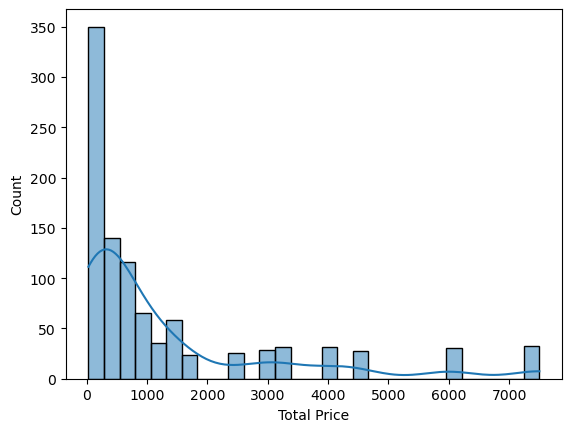

In [10]:
sns.histplot(data=df,x="Total Price",kde=True)

there is outliers lin the upper bound (high prices)

<Axes: xlabel='Age', ylabel='Count'>

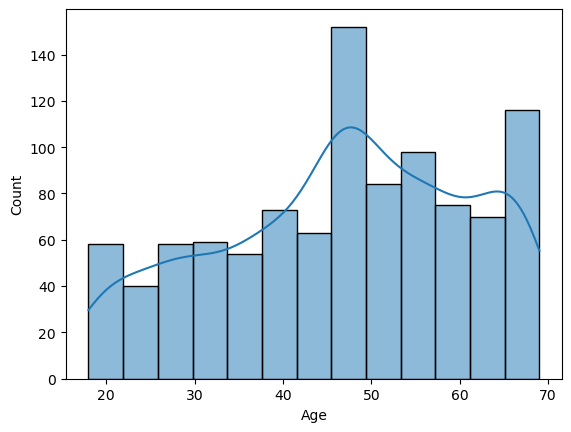

In [12]:
sns.histplot(data=df,x="Age",kde=True)

there is more higher ages >40 data skeewed to left 

<Axes: xlabel='Region', ylabel='Total Price'>

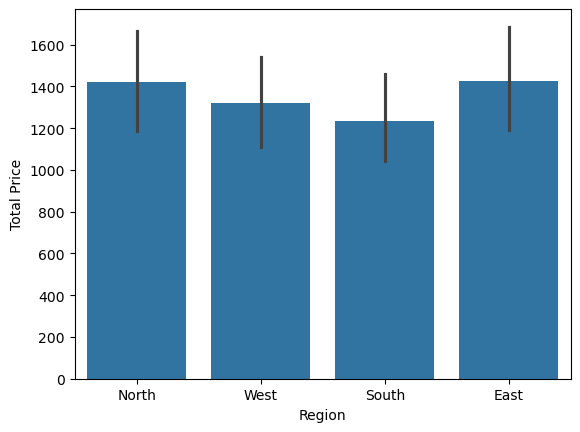

In [14]:
sns.barplot(data=df,x="Region",y="Total Price",estimator="mean")

Average total prices per region north region is the highest and the south is the lowest

<Axes: xlabel='Category', ylabel='Unit Price'>

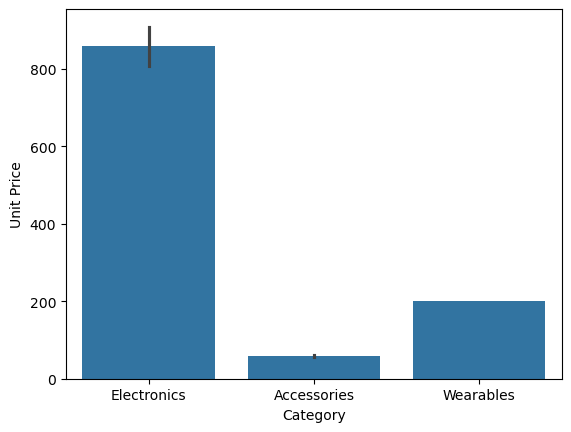

In [16]:
sns.barplot(data=df,x="Category",y="Unit Price",estimator="mean")

there is a huge difference in the average of unit price electronics is the highest and accessories is the lowest 

<Axes: xlabel='Gender', ylabel='Total Price'>

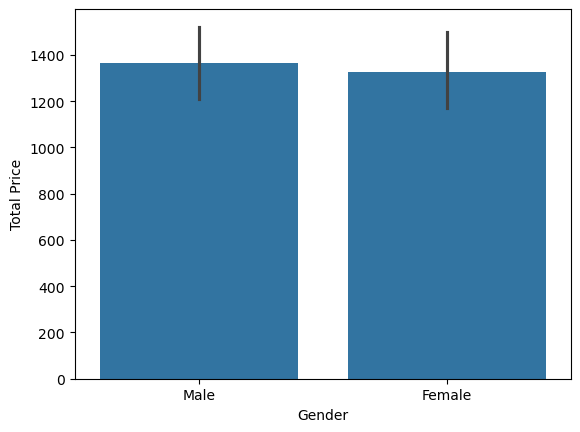

In [18]:
sns.barplot(data=df,x="Gender",y="Total Price",estimator="mean")

a slight difference between them but males are higher 

<Axes: xlabel='Quantity', ylabel='Unit Price'>

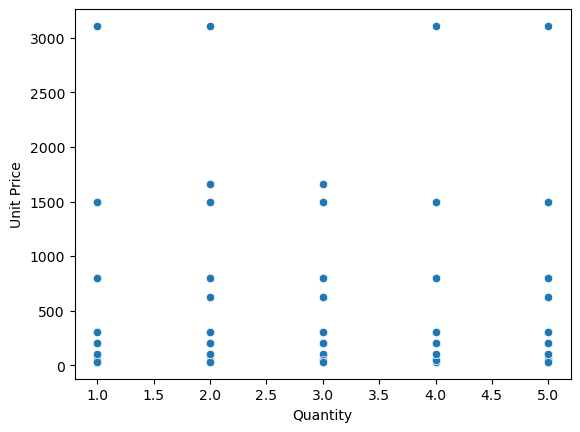

In [20]:
sns.scatterplot(data=df,x="Quantity",y="Unit Price")

there is a rare high unit price even if the quantity is big rather than that it is normal 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monitor'),
  Text(1, 0, 'Headphones'),
  Text(2, 0, 'Laptop'),
  Text(3, 0, 'Smartwatch'),
  Text(4, 0, 'Keyboard'),
  Text(5, 0, 'Mouse'),
  Text(6, 0, 'Smartphone')])

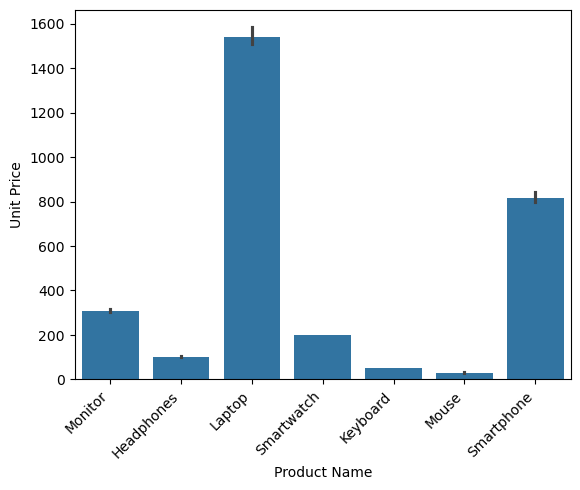

In [22]:
sns.barplot(data=df,x="Product Name",y="Unit Price")
plt.xticks(rotation=45,ha="right")

unit price >> Laptops in electronics are the highest also smart phones the lowest is mouse

<Axes: xlabel='Shipping Status', ylabel='count'>

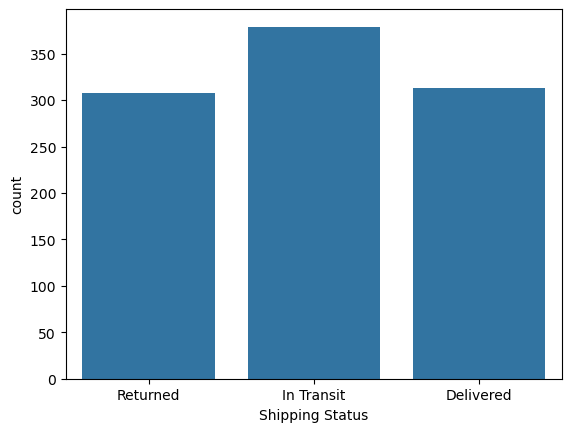

In [24]:
sns.countplot(data=df,x="Shipping Status")

<Axes: xlabel='Gender', ylabel='count'>

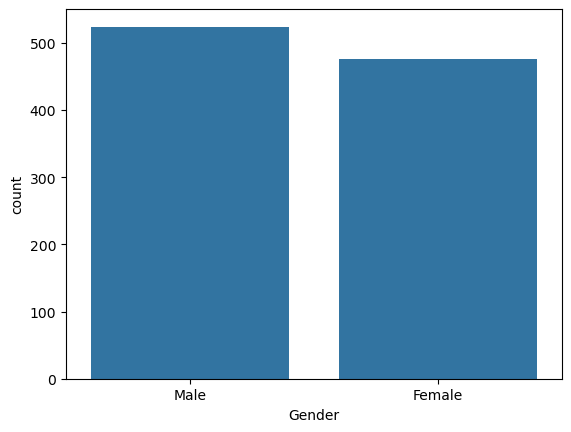

In [25]:
sns.countplot(data=df,x="Gender")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monitor'),
  Text(1, 0, 'Headphones'),
  Text(2, 0, 'Laptop'),
  Text(3, 0, 'Smartwatch'),
  Text(4, 0, 'Keyboard'),
  Text(5, 0, 'Mouse'),
  Text(6, 0, 'Smartphone')])

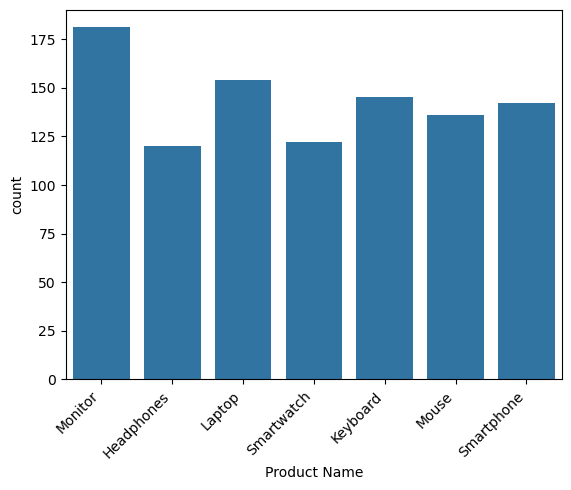

In [71]:
sns.countplot(data=df,x="Product Name")
plt.xticks(rotation=45,ha="right")

<Axes: xlabel='Order Date', ylabel='Total Price'>

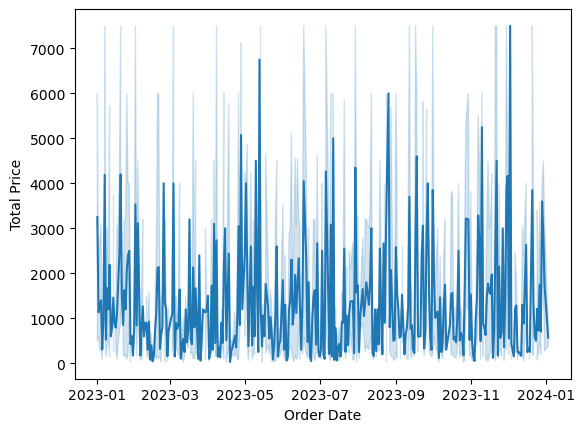

In [27]:
sns.lineplot(data=df,x="Order Date",y="Total Price")

a high peak at jan 2023 ,may 2023 sep 2023 and then jan 2024 

In [29]:
product_price=df.pivot_table(index="Product Name",values="Unit Price",aggfunc=["mean","max","min"])
product_price

,mean,max,min
,Unit Price,Unit Price,Unit Price
Product Name,,,
Headphones,101.788401,207.304041,100.0
Keyboard,50.740028,103.652020,50.0
Laptop,1541.806769,3109.560612,1500.0
Monitor,308.892600,621.912122,300.0
Mouse,30.946800,62.191212,30.0
Smartphone,818.135894,1658.432327,800.0
Smartwatch,200.000000,200.000000,200.0


In [30]:
quantity_per_category=df.pivot_table(index="Category",values="Quantity",aggfunc=["mean","max","min"])
quantity_per_category

,mean,max,min
,Quantity,Quantity,Quantity
Category,,,
Accessories,3.062344,5,1
Electronics,2.953878,5,1
Wearables,3.040984,5,1


the average quantity per category is 3

In [32]:
quantity_per_product=df.pivot_table(index="Product Name",values="Quantity",aggfunc=["mean"])
quantity_per_product

,mean
,Quantity
Product Name,
Headphones,3.083333
Keyboard,3.158621
Laptop,3.012987
Monitor,2.779006
Mouse,2.941176
Smartphone,3.112676
Smartwatch,3.040984


this to look more closer in product itself it also 3 in average

In [34]:
shipping_fee_per_Region=df.pivot_table(index="Region",values="Shipping Fee",aggfunc=["mean","max","min"])
shipping_fee_per_Region

,mean,max,min
,Shipping Fee,Shipping Fee,Shipping Fee
Region,,,
East,12.316840,19.84,5.00
North,12.548515,19.98,5.05
South,12.399385,19.94,5.02
West,12.405878,19.98,5.14


the shipping fee nearly the same in all regions 

In [36]:
Tprice_per_product=df.pivot_table(index="Product Name",values="Total Price",aggfunc=["mean","max","min","sum"])
Tprice_per_product

,mean,max,min,sum
,Total Price,Total Price,Total Price,Total Price
Product Name,,,,
Headphones,308.333333,500,100,37000
Keyboard,157.931034,250,50,22900
Laptop,4519.480519,7500,1500,696000
Monitor,833.701657,1500,300,150900
Mouse,88.235294,150,30,12000
Smartphone,2490.140845,4000,800,353600
Smartwatch,608.196721,1000,200,74200


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      1000 non-null   object        
 1   Gender           1000 non-null   object        
 2   Region           1000 non-null   object        
 3   Age              1000 non-null   int32         
 4   Product Name     1000 non-null   object        
 5   Category         1000 non-null   object        
 6   Unit Price       1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Total Price      1000 non-null   int64         
 9   Shipping Fee     1000 non-null   float64       
 10  Shipping Status  1000 non-null   object        
 11  Order Date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 90.0+ KB


In [38]:
age_per_Region=df.pivot_table(index="Region",values="Age",aggfunc=["mean","max","min"])
age_per_Region.round()

,mean,max,min
,Age,Age,Age
Region,,,
East,47.0,69,18
North,47.0,69,18
South,46.0,69,18
West,46.0,69,18


In [39]:
age_per_Gender=df.pivot_table(index="Gender",values="Age",aggfunc=["mean","max","min"])
age_per_Gender.round()

,mean,max,min
,Age,Age,Age
Gender,,,
Female,47.0,69,18
Male,47.0,69,18


In [40]:
money_per_gender=df.pivot_table(index="Category",columns="Gender",values="Total Price",aggfunc=["mean","max","min"])
money_per_gender

mean                 max          min     
Gender            Female         Male Female  Male Female Male
Category                                                      
Accessories   174.797980   183.694581    500   500     30   30
Electronics  2507.555556  2525.000000   7500  7500    300  300
Wearables     607.547170   608.695652   1000  1000    200  200

In [76]:
with pd.ExcelWriter("cleaned_E-commerce.xlsx") as writer:
    df.to_excel(writer,sheet_name="Main",index=False)
    age_per_Gender.to_excel(writer,sheet_name="age_per_Gender",index=True)
    money_per_gender.to_excel(writer,sheet_name="money_per_gender",index=True)
    Tprice_per_product.to_excel(writer,sheet_name="Tprice_per_product",index=True)
    shipping_fee_per_Region.to_excel(writer,sheet_name="shipping_fee_per_Region",index=True)
    product_price.to_excel(writer,sheet_name="unit_product_price",index=True)